## Applied Data Science

#### Uzair Alladin (VIT Chennai) - 20BAI1062

### Assignment - 2

#### Problem Description:

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.

Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-
class.

The problem associated with the Titanic dataset is to predict whether a passenger survived the disaster or not. The dataset contains various features such as passenger class, age, gender, cabin, fare, and whether the passenger had any siblings or spouses on board. These features can be used to build a predictive model to determine the likelihood of a passenger surviving the disaster. The dataset offers opportunities for feature engineering, data visualization, and model selection, making it a valuable resource for developing and testing data analysis and machine learning skills.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Question 1 - Load the Dataset

In [45]:
titanic = pd.read_csv('titanic.csv')
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


##### Question 2 - Perform Below Visualizations
<ul>
<li>Univariate Analysis <br>
<li>Bi-Variate Analysis <br>
<li>Multi-Variate Analysis <br>
</ul>

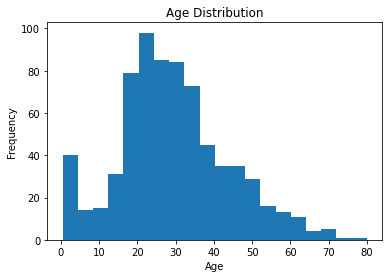

In [46]:
#Considering the Age - Univariate Analysis
plt.hist(titanic['age'].dropna(), bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

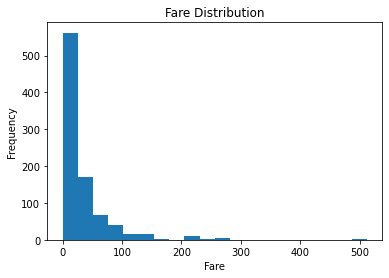

In [47]:
#Considering the Fare - Univariate Analysis
plt.hist(titanic['fare'], bins=20)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Distribution')
plt.show()

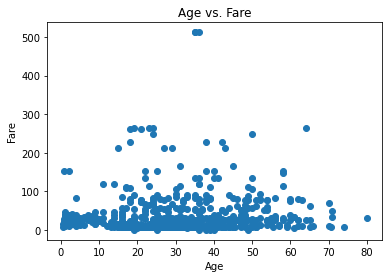

In [48]:
#Age vs Fare - Bi-variate Analysis
plt.scatter(titanic['age'], titanic['fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.show()

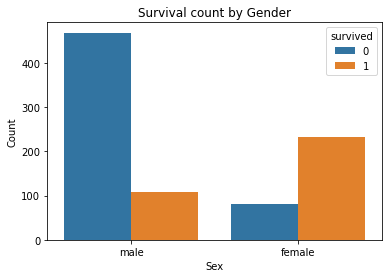

In [49]:
#Sex vs Survived - Bi-variate Analysis
sns.countplot(data=titanic, x='sex', hue='survived')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival count by Gender')
plt.show()

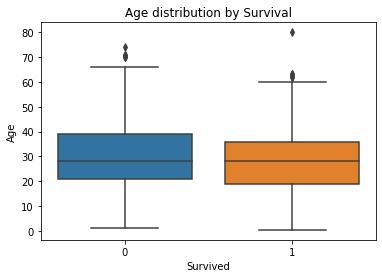

In [50]:
#Age vs Survived - Bi-variate Analysis
sns.boxplot(data=titanic, x='survived', y='age')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Age distribution by Survival')
plt.show()

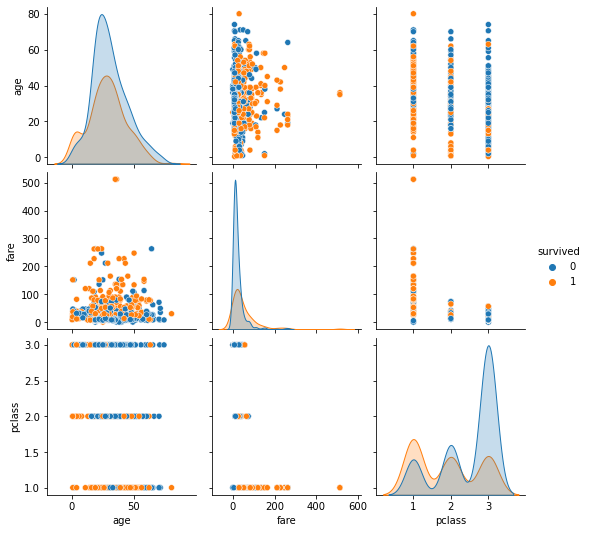

In [51]:
#Multivariate Analysis

imp = ['age','fare','pclass','sex','survived']

sns.pairplot(titanic[imp].dropna(), hue='survived')
plt.show()

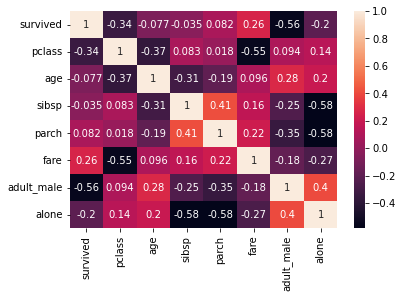

In [52]:
sns.heatmap(titanic.corr(), annot=True)
plt.show()

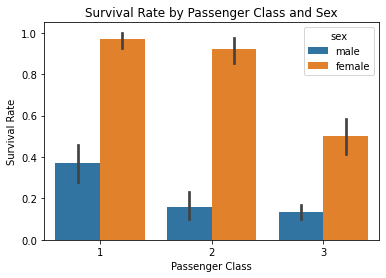

In [53]:
sns.barplot(data=titanic, x='pclass', y='survived', hue='sex')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class and Sex')
plt.show()

##### Question 3 - Perform descriptive statistics on the dataset.

In [54]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [56]:
missing_percentage = titanic.isnull().sum() / len(titanic) * 100
missing_percentage

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [57]:
corr_matrix = titanic.corr()
corr_matrix

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


##### Question 4 - Handle the Missing values.

In [58]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [59]:
titanic = titanic.drop(['deck'],axis=1)
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [60]:
mean_age = titanic['age'].mean()
titanic['age'].fillna(mean_age, inplace=True)

In [61]:
mode_embarked = titanic['embarked'].mode()[0]
titanic['embarked'].fillna(mode_embarked, inplace=True)

In [62]:
mode_embark_town = titanic['embark_town'].mode()[0]
titanic['embark_town'].fillna(mode_embarked, inplace=True)

In [63]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

##### Question 5 - Find the outliers and replace the outliers

<AxesSubplot:>

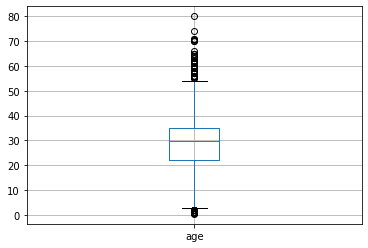

In [64]:
titanic.boxplot(column = 'age')

In [65]:
#Handling the Outliers of Age
age_median = titanic['age'].median()

# Set the threshold for outliers
age_upper_threshold = titanic['age'].quantile(0.75) + 1.5 * (titanic['age'].quantile(0.75) - titanic['age'].quantile(0.25))
age_lower_threshold = titanic['age'].quantile(0.25) - 1.5 * (titanic['age'].quantile(0.75) - titanic['age'].quantile(0.25))

# Replace outliers in 'Age' with the median
titanic.loc[titanic['age'] > age_upper_threshold, 'age'] = age_median
titanic.loc[titanic['age'] < age_lower_threshold, 'age'] = age_median

<AxesSubplot:>

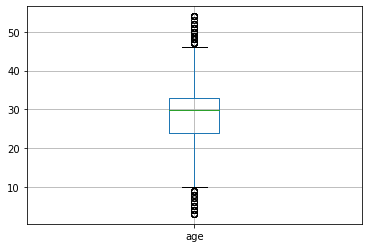

In [66]:
titanic.boxplot(column = 'age')

##### Question 6 - Check for Categorical columns and perform encoding.

In [67]:
#Performing One-Hot encoding for Sex Column
encoded = pd.get_dummies(titanic, columns=['sex'],drop_first=True)
encoded.head(10)

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,sex_male
0,0,3,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
1,1,1,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0
2,1,3,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0
4,0,3,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,1
5,0,3,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True,1
6,0,1,54.000000,0,0,51.8625,S,First,man,True,Southampton,no,True,1
7,0,3,29.699118,3,1,21.0750,S,Third,child,False,Southampton,no,False,1
8,1,3,27.000000,0,2,11.1333,S,Third,woman,False,Southampton,yes,False,0
9,1,2,14.000000,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False,0


In [68]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
titanic['Sex_Encoded'] = label_encoder.fit_transform(titanic['sex'])
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,Sex_Encoded
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,1
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True,1
6,0,1,male,54.000000,0,0,51.8625,S,First,man,True,Southampton,no,True,1
7,0,3,male,29.699118,3,1,21.0750,S,Third,child,False,Southampton,no,False,1
8,1,3,female,27.000000,0,2,11.1333,S,Third,woman,False,Southampton,yes,False,0
9,1,2,female,14.000000,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False,0


In [74]:
titanic.drop('sex',axis=1)
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,Sex_Encoded
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,1
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True,1
6,0,1,male,54.000000,0,0,51.8625,S,First,man,True,Southampton,no,True,1
7,0,3,male,29.699118,3,1,21.0750,S,Third,child,False,Southampton,no,False,1
8,1,3,female,27.000000,0,2,11.1333,S,Third,woman,False,Southampton,yes,False,0
9,1,2,female,14.000000,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False,0


##### Question 7 - Split the data into dependent and independent variables.

In [75]:
X = titanic[['pclass','age','sibsp','parch','fare','Sex_Encoded']]
X.head(10)

,pclass,age,sibsp,parch,fare,Sex_Encoded
0,3,22.000000,1,0,7.2500,1
1,1,38.000000,1,0,71.2833,0
2,3,26.000000,0,0,7.9250,0
3,1,35.000000,1,0,53.1000,0
4,3,35.000000,0,0,8.0500,1
5,3,29.699118,0,0,8.4583,1
6,1,54.000000,0,0,51.8625,1
7,3,29.699118,3,1,21.0750,1
8,3,27.000000,0,2,11.1333,0
9,2,14.000000,1,0,30.0708,0


In [76]:
y = titanic['survived']
y.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: survived, dtype: int64

##### Question 8 - Scale the independent variables

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head(10)

,pclass,age,sibsp,parch,fare,Sex_Encoded
0,0.827377,-0.708584,0.432793,-0.473674,-0.502445,0.737695
1,-1.566107,0.924948,0.432793,-0.473674,0.786845,-1.355574
2,0.827377,-0.300201,-0.474545,-0.473674,-0.488854,-1.355574
3,-1.566107,0.618661,0.432793,-0.473674,0.420730,-1.355574
4,0.827377,0.618661,-0.474545,-0.473674,-0.486337,0.737695
5,0.827377,0.077463,-0.474545,-0.473674,-0.478116,0.737695
6,-1.566107,2.558480,-0.474545,-0.473674,0.395814,0.737695
7,0.827377,0.077463,2.247470,0.767630,-0.224083,0.737695
8,0.827377,-0.198105,-0.474545,2.008933,-0.424256,-1.355574
9,-0.369365,-1.525350,0.432793,-0.473674,-0.042956,-1.355574


##### Question 9 - Split the data into training and testing

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [80]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 15 to 768
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       712 non-null    int64  
 1   age          712 non-null    float64
 2   sibsp        712 non-null    int64  
 3   parch        712 non-null    int64  
 4   fare         712 non-null    float64
 5   Sex_Encoded  712 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 38.9 KB


In [81]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 541 to 624
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       179 non-null    int64  
 1   age          179 non-null    float64
 2   sibsp        179 non-null    int64  
 3   parch        179 non-null    int64  
 4   fare         179 non-null    float64
 5   Sex_Encoded  179 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 9.8 KB
